In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
path_to_folder = "ENPM673/"
%cd /content/drive/My\ Drive/{path_to_folder}

/content/drive/My Drive/ENPM673


In [3]:
#Dependencies
import cv2 as cv
import os
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [4]:
video_path = '/content/drive/MyDrive/ENPM673/object_tracking.mp4'
output_path = '/content/drive/MyDrive/ENPM673/frames'
os.makedirs(output_path, exist_ok=True)

#Initializing variables
thres_value = 8

# Opening video file
video_capture = cv.VideoCapture(video_path)

# Looping through the video frames
i = 0
while True:
    # for reading the next frame
    ret, frame = video_capture.read()

    # break the loop
    if not ret:
        break

    # Writing the frame to drive
    frame_filename = os.path.join(output_path, f"frame_{i}.jpg")
    cv.imwrite(frame_filename, frame)

    i += 1

# Releasing the video capture object
video_capture.release()

print(f"Frames extracted: {i}")
print("Extraction complete.")

Frames extracted: 881
Extraction complete.


In [5]:
# Loop/image

data_x = []
data_y = []
val_dark = []
for i in range(1, 882):
    # file path for the current image
    file_path = f'/content/drive/MyDrive/ENPM673/frames/frame_{i}.jpg'  # Assuming image names are like image_1.jpg, image_2.jpg, ...

    # Read images
    image = cv.imread(file_path)

    # Checking if the images is read successfully
    if image is not None:
        # Converting the images to grayscale
        gray_pics = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        sort = np.where(gray_pics < thres_value,0,255).astype(np.uint8)
        cordi = np.where(sort == 0)
        if len(cordi[0]>0):
          center =  [np.mean(cordi[1]), np.mean(cordi[0])]
          center_x = (np.mean(cordi[1]))
          center_y = (np.mean(cordi[0]))
          val_dark.append(center)
          data_x.append(center_x)
          data_y.append(center_y)
          i += 1


        # overwriting
        cv.imwrite(file_path, gray_pics)
        print(f"Image {i}: Grayscaled and saved successfully.")
    else:
        print(f"Image {i}: Unable to read.")

Image 1: Grayscaled and saved successfully.
Image 2: Grayscaled and saved successfully.
Image 3: Grayscaled and saved successfully.
Image 4: Grayscaled and saved successfully.
Image 5: Grayscaled and saved successfully.
Image 6: Grayscaled and saved successfully.
Image 7: Grayscaled and saved successfully.
Image 8: Grayscaled and saved successfully.
Image 9: Grayscaled and saved successfully.
Image 10: Grayscaled and saved successfully.
Image 11: Grayscaled and saved successfully.
Image 12: Grayscaled and saved successfully.
Image 13: Grayscaled and saved successfully.
Image 14: Grayscaled and saved successfully.
Image 15: Grayscaled and saved successfully.
Image 16: Grayscaled and saved successfully.
Image 17: Grayscaled and saved successfully.
Image 18: Grayscaled and saved successfully.
Image 19: Grayscaled and saved successfully.
Image 20: Grayscaled and saved successfully.
Image 21: Grayscaled and saved successfully.
Image 22: Grayscaled and saved successfully.
Image 23: Grayscale

[1011.41637636 1011.39960154 1011.4145635  1011.4145635  1004.51419855
 1004.35663003 1004.31398358  996.63133588  996.590791    996.6218952
  996.67333819  996.66368868  996.66368868  996.66473373  996.66368868
  996.67410859  996.67306514  971.62698512  971.53604654  971.52638977
  962.71794036  962.63663011  962.63445065  952.42292957  952.06252091
  951.97193363  942.25788712  942.07199957  942.07602418  933.0143952
  933.1719725   933.26409176  933.28484529  922.39987715  922.278787
  922.26445335  908.78076002  909.65737379  909.7749095   900.92939268
  901.15220596  901.75295038  886.08828981  885.91869296  885.77268685
  885.8279274   875.58647068  876.1384249   876.13207643  856.55779459
  856.69724613  856.69865251  856.36870842  856.18979552  856.12499475
  856.03229531  856.13693891  856.51693623  809.02075174  809.0023215
  809.09579678  809.02280558  790.14639849  789.76125192  787.95504283
  787.73011023  788.01775979  788.01030907  787.96765111  788.08929295
  788.03642

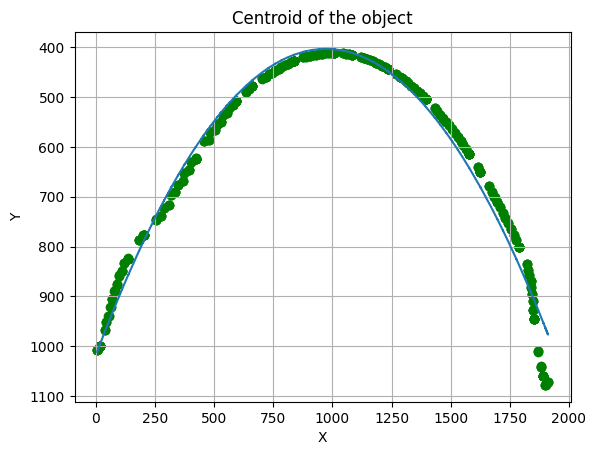

In [6]:
# Polynomial Curve Fitting
data_x = np.array(data_x)
data_y = np.array(data_y)

# Constructing the feature matrix
X_matrix = np.column_stack([np.ones_like(data_x), data_x, (data_x)**2])
# Computing coefficients using least squares
coefficients = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ data_y
# Extracting coeff for poly ax^2 + bx + c
c, b, a = coefficients
# calulating fitted values
fitted_y = c + b * data_x + a * (data_x**2)
print(fitted_y)  # Print the fitted values
print(len(fitted_y))  # Print the length of the fitted values array



#Printing MatPLotlib
val_dark = np.array(val_dark)
plt.grid(True)
plt.scatter(val_dark[:, 0], val_dark[:, 1], c='g', marker='o')
plt.plot(data_x, fitted_y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Centroid of the object')
plt.gca().invert_yaxis()
plt.show()


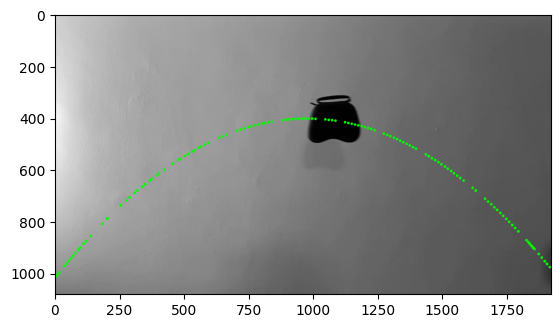

In [7]:
# path to the image file
image_path = "/content/drive/MyDrive/ENPM673/frames/frame_500.jpg"

# Read the image from the specified path
input_image = cv.imread(image_path)

# copying of the image for the trajectory plot
trajectory_image = input_image.copy()

# Loop through each centroid coordinate and draw a circle
for i in range(len(data_x)):
    if not np.isnan(data_x).any():
    # Draw a circle at the centroid coordinate
       cv.circle(trajectory_image, (int(data_x[i]), int(fitted_y[i])), radius=5, color=(0, 255, 0), thickness=-1)

# Display the image with the trajectory plot
plt.imshow(cv.cvtColor(trajectory_image, cv.COLOR_BGR2RGB))
plt.show()

In [8]:
# Setting the value of x to 1000
xval = 1000

# Calculating the value of Y based on a quadratic equation
y_axis = c + b * xval + a * (xval ** 2)

# Displaying the calculated value of Y
print("value of Y when value of X is 1000:", int(y_axis))

value of Y when value of X is 1000: 403
